{'root': {'001': {'a': {'003': {'c': {0: 'e'}}, 1: 'd'}}, '002': 'b'}}


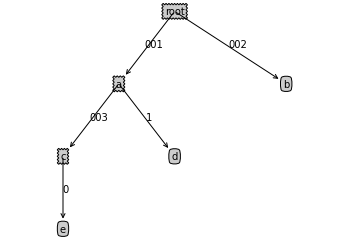

In [224]:
from collections import deque
#节点
class Node:
    def __init__(self,attribute='',children=[],parent='') -> None:
        self.attr=attribute
        self.children=children
        self.parent=parent
   
#树
class Tree:
    def __init__(self,root) -> None:
        self.root=root
        
    def plot(self):
        tree_json={self.root.attr:{}}#DFS

        if(len(self.root.children)!=0):
            node_queue=deque([self.root])
            json_queue=deque([tree_json[self.root.attr]])
            
            while(len(node_queue)!=0):
                cur_node=node_queue.popleft()
                cur_arr=cur_node.children
                cur_json=json_queue.popleft()
                for i in range(len(cur_arr)):
                    if(cur_arr[i].children!=[]):#非叶节点
                        if(cur_arr[i].parent!=''):
                            cur_json[cur_arr[i].parent]={cur_arr[i].attr:{}}
                            json_queue.append(cur_json[cur_arr[i].parent][cur_arr[i].attr])
                        else:
                            cur_json[i]={cur_arr[i].attr:{}}
                            json_queue.append(cur_json[i][cur_arr[i].attr])
                        node_queue.append(cur_arr[i])
                        
                    else:
                        if(cur_arr[i].parent!=''):
                            cur_json[cur_arr[i].parent]=cur_arr[i].attr
                        else:
                            cur_json[i]=cur_arr[i].attr
            print(tree_json)
            tp.createPlot(tree_json)
        
import treePlotter as tp 
root=Node("root",[Node('a',[Node("c",[Node('e')],'003'),Node('d')],"001"),Node('b',parent="002")])
t1=Tree(root)
t1.plot()

In [225]:
import math
class Dataset:
    def __init__(self,arr,attrs,class_name):
        self.data=arr#用来分类的类名如"好瓜"
        self.attrs=attrs
        self.class_name=class_name
        self.count=len(self.data)
        tmp=self.get_prop(class_name)
        ans=0
        for i in tmp:
            if(tmp[i]!=0):
                ans-=tmp[i]*math.log2(tmp[i])
        self.entropy=ans
        
    def get_prop(self,attr):
        arr=[obj[attr] for obj in self.data]
        tmp={}
        for attr in A[attr]:
            tmp[attr]=0
        for attr in arr:
            tmp[attr]+=1
        for i in tmp:
            tmp[i]/=len(arr)
        return tmp
    
    def get_gain(self,attr):
        tmp={}
        for i in A[attr]:
            tmp[i]={}
            for j in A[self.class_name]:
                tmp[i][j]=0
            tmp[i]['num']=0
        for k in self.data:
            tmp[k[attr]][k[self.class_name]]+=1
            tmp[k[attr]]['num']+=1
        ent=0
        for i in tmp:
            for j in A[self.class_name]:
                num=tmp[i][j]
                if(num!=0):
                    ent-=(num/self.count)*math.log2(num/tmp[i]['num'])
        return self.entropy-ent
D = [
    {'色泽': '青绿', '根蒂': '蜷缩', '敲声': '浊响', '纹理': '清晰', '脐部': '凹陷', '触感': '硬滑', '好瓜': '是'},
    {'色泽': '乌黑', '根蒂': '蜷缩', '敲声': '沉闷', '纹理': '清晰', '脐部': '凹陷', '触感': '硬滑', '好瓜': '是'},
    {'色泽': '乌黑', '根蒂': '蜷缩', '敲声': '浊响', '纹理': '清晰', '脐部': '凹陷', '触感': '硬滑', '好瓜': '是'},
    {'色泽': '青绿', '根蒂': '蜷缩', '敲声': '沉闷', '纹理': '清晰', '脐部': '凹陷', '触感': '硬滑', '好瓜': '是'},
    {'色泽': '浅白', '根蒂': '蜷缩', '敲声': '浊响', '纹理': '清晰', '脐部': '凹陷', '触感': '硬滑', '好瓜': '是'},
    {'色泽': '青绿', '根蒂': '稍蜷', '敲声': '浊响', '纹理': '清晰', '脐部': '稍凹', '触感': '软粘', '好瓜': '是'},
    {'色泽': '乌黑', '根蒂': '稍蜷', '敲声': '浊响', '纹理': '稍糊', '脐部': '稍凹', '触感': '软粘', '好瓜': '是'},
    {'色泽': '乌黑', '根蒂': '稍蜷', '敲声': '浊响', '纹理': '清晰', '脐部': '稍凹', '触感': '硬滑', '好瓜': '是'},
    {'色泽': '乌黑', '根蒂': '稍蜷', '敲声': '沉闷', '纹理': '稍糊', '脐部': '稍凹', '触感': '硬滑', '好瓜': '否'},
    {'色泽': '青绿', '根蒂': '硬挺', '敲声': '清脆', '纹理': '清晰', '脐部': '平坦', '触感': '软粘', '好瓜': '否'},
    {'色泽': '浅白', '根蒂': '硬挺', '敲声': '清脆', '纹理': '模糊', '脐部': '平坦', '触感': '硬滑', '好瓜': '否'},
    {'色泽': '浅白', '根蒂': '蜷缩', '敲声': '浊响', '纹理': '模糊', '脐部': '平坦', '触感': '软粘', '好瓜': '否'},
    {'色泽': '青绿', '根蒂': '稍蜷', '敲声': '浊响', '纹理': '稍糊', '脐部': '凹陷', '触感': '硬滑', '好瓜': '否'},
    {'色泽': '浅白', '根蒂': '稍蜷', '敲声': '沉闷', '纹理': '稍糊', '脐部': '凹陷', '触感': '硬滑', '好瓜': '否'},
    {'色泽': '乌黑', '根蒂': '稍蜷', '敲声': '浊响', '纹理': '清晰', '脐部': '稍凹', '触感': '软粘', '好瓜': '否'},
    {'色泽': '浅白', '根蒂': '蜷缩', '敲声': '浊响', '纹理': '模糊', '脐部': '平坦', '触感': '硬滑', '好瓜': '否'},
    {'色泽': '青绿', '根蒂': '蜷缩', '敲声': '沉闷', '纹理': '稍糊', '脐部': '稍凹', '触感': '硬滑', '好瓜': '否'},
]

A={'色泽':['青绿','乌黑','浅白'],'根蒂':['蜷缩','稍蜷','硬挺'],'敲声':['沉闷','浊响','清脆'],'纹理':['清晰','稍糊','模糊'],'脐部':['平坦','稍凹','凹陷'],'触感':['硬滑','软粘'],'好瓜':['是','否']}
dataset=Dataset(D,A,"好瓜")
dataset.get_gain("敲声")

0.14078143361499607

In [226]:
max_gain=0
best_attr=''

for i in A:
    if(i!=dataset.class_name):
        cur_gain=dataset.get_gain(i)
        # print(cur_gain)
        if(cur_gain>max_gain):
            max_gain=cur_gain
            best_attr=i
decision_tree=Tree(Node(best_attr))


#递归从一个节点生成children
def generate_children(node,D,A):
    for i in A[node.attr]:
        print(i)
        next_dataset=[]
        for j in D:
            if(j[node.attr]==i):
                next_dataset.append(j)
        # print(next_dataset)
        if(next_dataset!=[]):
            tmpA=A.copy()
            del tmpA[node.attr]
            dataset=Dataset(next_dataset,tmpA,"好瓜")

            max_gain=0
            tmp_best_attr=''

            for k in tmpA:
                if(k!=dataset.class_name):
                    cur_gain=dataset.get_gain(k)
                    # print(cur_gain)
                    if(cur_gain>max_gain):
                        max_gain=cur_gain
                        tmp_best_attr=k
            if(tmp_best_attr!=''):
                node.children.append(generate_children(Node(tmp_best_attr,parent=i),next_dataset,tmpA))
    return node
# 递归和类形参实参传递冲突，建议优化成非递归
Tree(generate_children(Node(best_attr),D,A))

清晰
蜷缩
稍蜷
青绿
乌黑
硬滑
软粘
浅白
硬挺
稍糊
硬滑
软粘
模糊
